In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
h,w = 100,100
keep_amt = .25

In [3]:
def reward_function(x,y):
    return ((x-20)**2 + (y-20)**2)*-1

In [4]:
rew_func = np.ones((h, w))
for i in range(h):
    for j in range(w):
        rew_func[i][j] = reward_function(i,j)

In [5]:
class training_loop():
    def __init__(self):
        super(training_loop, self).__init__()
        
        self.mean = np.array([75, 75])
        self.cov = np.identity(self.mean.shape[0])
        
        self.samples = 100
        self.keep_amt = .25
        self.cm = .1
        self.mean_fac = .9
        self.cv = 1
    
    def get_rewards(self,tot_list,samples):
        x_list, y_list = tot_list.T
        rew_list = []
        for i in range(samples):
            x = x_list[i]
            y = y_list[i]
            r = reward_function(x,y)
            rew_list.append([r,x,y])
        rew_list.sort(reverse=True)
        return rew_list
    
    def sample(self):
        tot_list = np.random.multivariate_normal(np.zeros(self.mean.shape[0]), np.identity(self.mean.shape[0]), self.samples)
        return tot_list
    
    def get_basis(self,v,V):
        v = v / np.linalg.norm(v)
        r_vec_list = [v]
        count = -1
        for v1 in V:
            tot_sub = 0
            for vector in r_vec_list:
                tot_sub += np.dot(vector,v1) * vector
            v1 = v1 - tot_sub
            if(sum(abs(v1))>.000000001):
                v1 = v1 / np.linalg.norm(v1)
                r_vec_list.append(v1)

        return np.array(r_vec_list)
    
    def scale_m(self,mean,best_mean):
        mean_dif = sum(abs(best_mean-mean))
        scale_factor = 2/(1+math.exp(-mean_dif))
        return scale_factor
    
    def train(self):
        #sample from current mean and convariance
        tot_list = self.mean + np.matmul(self.sample(),self.cov)*self.cv
        
        #test samples
        rew_list = self.get_rewards(tot_list,self.samples)
        
        #Get best samples
        top_samples = rew_list[0:int(self.samples*self.keep_amt)]
        top_samples = np.array(top_samples)
        top_xy_list = np.array(top_samples[:,1:])
        
        #get mean of top samples
        best_mean = np.mean(top_xy_list.T,axis=1)
        
        #Get new basis vectors
        V = self.get_basis(self.mean,np.identity(self.mean.shape[0]))
        
        #scale first vector in direction of mean
        V[0] = V[0]*self.scale_m(self.mean,best_mean)
        
        #scale covariance
        V = V*(self.scale_m(self.mean,best_mean)-.1)      #scale covariance matrix by mean differences
        V = V*(sum(abs(V.reshape(-1)))/V.shape[0] - 1)    #scale covariance based on best covariance
        
        #set mean and covariance values for next training step
        self.mean = self.mean_fac*best_mean + (1-self.mean_fac)*self.mean
        self.cov = V
    

In [6]:
train_lists = []
epochs = 15
training_class = training_loop()
for epoch in range(epochs):
    tot_list = training_class.mean + np.matmul(training_class.sample(),training_class.cov)*training_class.cv
    x_list, y_list = tot_list.T
    training_class.train()
    train_lists.append([x_list,y_list])

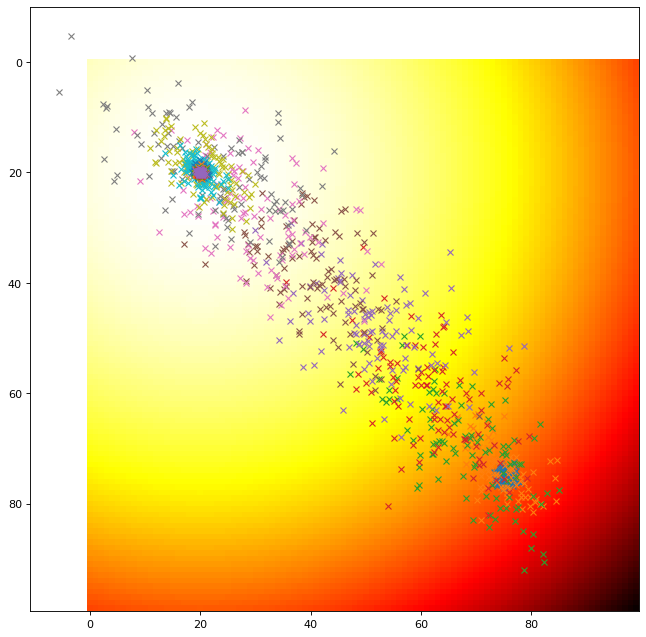

In [7]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(rew_func, cmap='hot', interpolation='nearest')
for i in range(epochs):
    plt.plot(train_lists[i][0], train_lists[i][1], 'x')
plt.show()

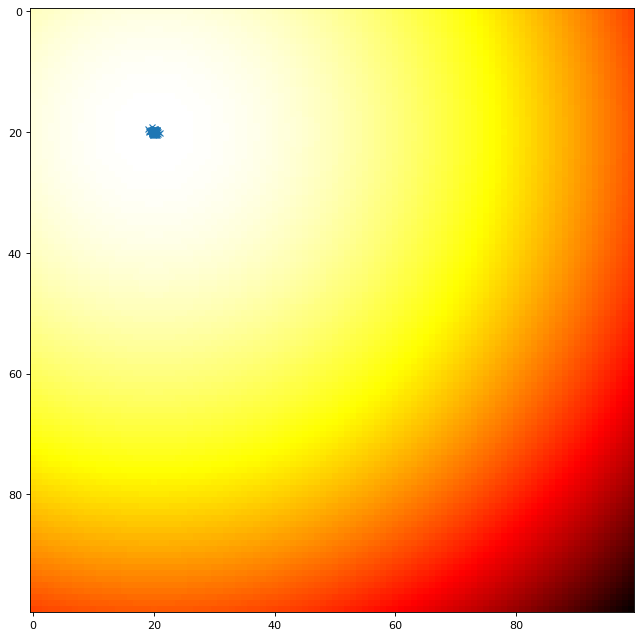

In [8]:
temp = 14
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(rew_func, cmap='hot', interpolation='nearest')
plt.plot(train_lists[temp][0], train_lists[temp][1], 'x')
plt.show()